<p>
 Reflectivity is the limit value of reflectance when the sample is thick. It is the intrinsic reflection of the surface.

Reflectance is a fraction of electromagnetic power reflected form material or surface. Reflectivity is a property of a material.
</p>
<span style = 'color: red'> Notes: </span>
<ol>
    <li> 30 Nov started working on vacuum data</li>
</ol>

In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import scipy
from scipy.stats import norm
from scipy.interpolate import interp1d

In [1]:
%%html
<!--- html styling for Jupyter Dark Theme---!>
<style>
.CodeMirror-focused .CodeMirror-selected { background: none; }
.CodeMirror-focused .CodeMirror-selectedtext { background: #FF0088; } 
.CodeMirror-selected { background:  grey; }
</style>
<!--- greenish #00FF88 ; pinkish #FF0088 ; turquoise---!>

In [3]:
project_dir = r'C:\Users\sarth\projects\LY_Analytic_Model'

In [4]:
R_SiPM_measured_df = pd.read_csv(path.join(project_dir,
                                           'Data', 'sipm_hr1_processed.txt'), 
                                 sep='\t')
# 'Data' is the name of the folder containing Data files

# R_SiPM_measured_df['R'] = [int(value)/100 for value in R_SiPM_measured_df['R']]

R_SiPM_measured_df['R'] = R_SiPM_measured_df['R']/100

In [5]:
# R_SiPM_measured_df['R']

In [6]:
# R_SiPM_alberto_df = pd.read_csv(path.join(project_dir, 'Data', 'aberto_data', 
#                                           'all_data reflectance LAr_NUV-HD-Cryo.txt'), 
#                                 sep='\t')
R_SiPM_alberto_df = pd.read_csv(path.join(project_dir, 'Data', 'aberto_data', 
                                          'all_data reflectance vacuum_NUV-HD-Cryo.txt'), 
                                sep='\t')

# R_SiPM_alberto_df['Wavelength']
# R_SiPM_alberto_df['']
R_SiPM_alberto_df

,Wavelength,00,05,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85
0,120,0.170305,0.196591,0.339463,0.403891,0.156151,0.410533,0.207734,0.212180,0.375018,0.355141,0.222989,0.122360,0.261892,0.349484,0.237675,0.387611,0.398472,0.684467
1,121,0.388295,0.412883,0.397474,0.179242,0.357661,0.214957,0.398365,0.190570,0.167235,0.324358,0.363067,0.277715,0.130474,0.289530,0.349103,0.314745,0.495173,0.579457
2,122,0.356095,0.309093,0.171712,0.281491,0.373578,0.208597,0.279195,0.381072,0.205790,0.121778,0.258259,0.345706,0.292621,0.142597,0.342102,0.317393,0.426802,0.683041
3,123,0.153550,0.163651,0.290526,0.409284,0.152330,0.396470,0.138269,0.289927,0.370074,0.240899,0.106643,0.208722,0.329516,0.276757,0.241274,0.373003,0.492427,0.621435
4,124,0.341474,0.378097,0.406985,0.215138,0.282819,0.280151,0.340337,0.116669,0.265319,0.355258,0.271835,0.115789,0.206240,0.323543,0.218394,0.370712,0.395033,0.670725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,996,0.037077,0.037038,0.039190,0.049863,0.076920,0.123729,0.182837,0.237069,0.268726,0.267864,0.235033,0.179393,0.115852,0.084174,0.151359,0.304988,0.483444,0.694196
877,997,0.037007,0.037184,0.039968,0.051590,0.079616,0.126939,0.185760,0.238984,0.269294,0.267090,0.233129,0.176660,0.113037,0.083630,0.154444,0.308613,0.485316,0.694453
878,998,0.037060,0.037451,0.040860,0.053411,0.082366,0.130152,0.188643,0.240843,0.269805,0.266268,0.231188,0.173907,0.110266,0.083235,0.157606,0.312165,0.487082,0.694636
879,999,0.037232,0.037837,0.041865,0.055324,0.085168,0.133365,0.191488,0.242647,0.270261,0.265398,0.229209,0.171136,0.107541,0.082989,0.160836,0.315641,0.488743,0.694743


<h3 style = 'color:orange'> Get Reflectance value for 7 degree incidence by interpolating along rows. </h3>

In [7]:
# R_SiPM_alberto_df = pd.read_csv(path.join(project_dir, 'Data','aberto_data','all_data reflectance LAr_NUV-HD-Cryo.txt'), sep = '\t') 
chosen_wavelength = 7
value_list = []
angle_list = np.arange(0, 90, 5)
for row_index in range(R_SiPM_alberto_df.shape[0]):
    R_value_single_wavelength = R_SiPM_alberto_df.iloc[row_index, 1:]
    interpolate_func = interp1d(angle_list, R_value_single_wavelength)
    interpolate_value = interpolate_func(chosen_wavelength)
    value_list.append(float(interpolate_value))

R_SiPM_alberto_df.insert(3, str(chosen_wavelength), value_list, False)

In [8]:
## 5 and 10 degrees and 5 nm slit 

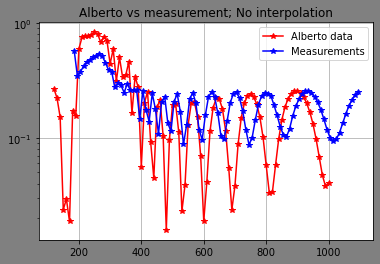

In [9]:
fig1 = plt.figure()
ax1 = plt.axes()

ax1.plot(R_SiPM_alberto_df['Wavelength'][0::10],
         ((R_SiPM_alberto_df['05'] + R_SiPM_alberto_df['10'])/2)[0::10],
         marker='*', color='red', label='Alberto data')
ax1.plot(R_SiPM_measured_df['Wavelength'][::10], R_SiPM_measured_df['R'][::10], marker = '*', color = 'blue', label = 'Measurements')
ax1.set_yscale('log')
ax1.grid()
fig1.set_facecolor('grey')
ax1.set_title('Alberto vs measurement; No interpolation')
ax1.legend()

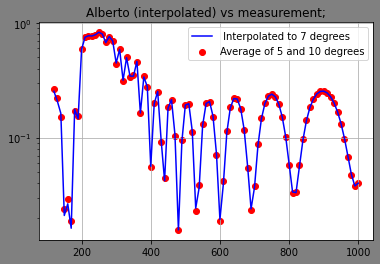

In [10]:
%matplotlib inline

fig5 = plt.figure()
ax5 = plt.axes()
ax5.scatter(R_SiPM_alberto_df['Wavelength'][0::10], ((R_SiPM_alberto_df['05'] + R_SiPM_alberto_df['10'])/2)[0::10], color = 'red', label = 'Average of 5 and 10 degrees' )
ax5.plot(R_SiPM_alberto_df['Wavelength'][0::10], R_SiPM_alberto_df['7'][0::10], color = 'blue', label = ' Interpolated to 7 degrees ')
ax5.set_yscale('log')
ax5.grid()
fig5.set_facecolor('grey')
ax5.set_title('Alberto (interpolated) vs measurement;')
ax5.legend()

<h4 style = 'color: orange'> Making Smooth functions </h4>

In [11]:
## smoothing

# R_SiPM_alberto_7_5_degrees = (R_SiPM_alberto_df['05'] + R_SiPM_alberto_df['10'])/2

# R_SiPM_alberto_inter_func = interp1d(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_7_5_degrees)

R_SiPM_alberto_7_inter_func = interp1d( R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['7'] )
R_SiPM_measured_inter_func = interp1d( R_SiPM_measured_df['Wavelength'], R_SiPM_measured_df['R'] )

wavelength_vector = np.arange(240, 1000, 5)

R_SiPM_alberto_7_smooth = R_SiPM_alberto_7_inter_func(wavelength_vector)
R_SiPM_measured_smooth = R_SiPM_measured_inter_func(wavelength_vector)


## 5 and 10 degree function probably not that relevant anymore. comment out?

R_SiPM_alberto_05_inter_func = interp1d(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['05'])
R_SiPM_alberto_10_inter_func = interp1d(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['10'])

R_SiPM_alberto_05_smooth = R_SiPM_alberto_05_inter_func(wavelength_vector)
R_SiPM_alberto_10_smooth = R_SiPM_alberto_10_inter_func(wavelength_vector)



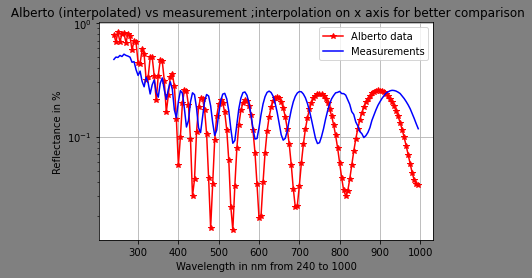

In [12]:
# %matplotlib qt
fig2 = plt.figure()
ax2 = plt.axes()
ax2.plot(wavelength_vector, R_SiPM_alberto_7_smooth, marker = '*', color = 'red', label = 'Alberto data' )
ax2.plot(wavelength_vector, R_SiPM_measured_smooth, color = 'blue', label = 'Measurements' )
ax2.set_yscale('log')
fig2.set_facecolor('grey')
ax2.set_title(' Alberto (interpolated) vs measurement ;interpolation on x axis for better comparison')
ax2.set_xlabel('Wavelength in nm from 240 to 1000')
ax2.set_ylabel('Reflectance in %')
ax2.grid()
ax2.legend()

In [13]:
# max( R_SiPM_alberto_df['05'] )

In [14]:
# max( R_SiPM_alberto_df['10'] )

In [15]:
# max( R_SiPM_alberto_df['7'] ) 

In [16]:
# max( R_SiPM_measured_df['R'] )

In [17]:
## how remove effect of finite slit width specrtra? Astronomy may have some effect.

In [18]:
### didn't work.

# spectra_file = path.join(project_dir, 'Data', 'tpbesr_man_hr1.spc')

# from pyspectra.readers.read_spc import read_spc

# spc_data = read_spc(r'C:\Users\sarth\projects\LY_Analytic_Model\Data\tpbesr_man_hr1.spc')

# spc_data

<h4 style = 'color: orange;'>  Playing with convolution</h4>

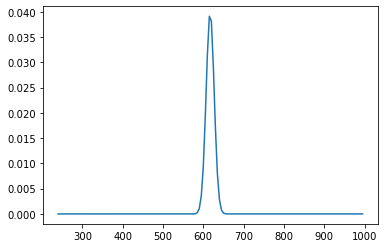

mean: 617 
 sd: 10


In [19]:
# plt.plot(np.convolve(sin_func, norm.pdf(x_axis, mean, sd)))
# len( np.convolve(sin_func, norm.pdf(x_axis, mean, sd)) )

%matplotlib inline

x_axis = np.arange(240, 1000, 5)
### Calculating mean and standard deviation
mean = statistics.mean(x_axis)
# sd = statistics.stdev(x_axis)
### we provide standard deviation as per our requirement
# sd = 5  ; Marcin suggests sd = 5
sd = 10

norm_distr = norm.pdf(x_axis, mean, sd) 
# norm_distr = norm.pdf(x_axis, mean, 50) 
plt.plot(x_axis, norm_distr )
plt.show()

print('mean:', mean, '\n', 'sd:', sd)

<h4 style = "color:orange"> back to  comparison</h4>

<p> new computations with convolution </p>

In [20]:
# R_SiPM_alberto_convolved = np.convolve( R_SiPM_alberto_smooth, norm_distr, 'same')

# %matplotlib inline
# # %matplotlib qt

# fig3 = plt.figure()
# ax3 = plt.axes()

# ax3.plot(wavelength_vector, R_SiPM_alberto_convolved, marker = '*', color = 'lime', label = 'Alberto convolved' )
# ax3.plot(wavelength_vector, R_SiPM_alberto_smooth, marker = '*', color = 'red', label = 'Alberto data' )
# ax3.plot(wavelength_vector, R_SiPM_measured_smooth, marker = '*', color = 'blue', label = 'Measurements' )

# ax3.plot(wavelength_vector, norm_distr, marker = '*', color = 'teal', label ='Normal distribution ')
# ax3.set_yscale('log')
# fig3.set_facecolor('grey')
# ax3.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
# ax3.set_xlabel('Wavelength in nm from 240 to 1000')
# ax3.set_ylabel('Reflectance in %')
# ax3.grid()
# ax3.legend()

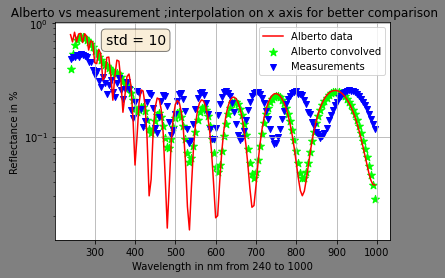

In [21]:
### Normalization to achieve sum of all bins on y axis  = 1 (Marcin)

R_SiPM_alberto_7_convolved = np.convolve(  R_SiPM_alberto_7_smooth, norm_distr/sum(norm_distr), 'same')

%matplotlib inline
# %matplotlib qt

fig3 = plt.figure('3')
ax3 = plt.axes()

ax3.scatter(wavelength_vector, R_SiPM_alberto_7_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved' )
ax3.plot(wavelength_vector,  R_SiPM_alberto_7_smooth, color = 'red', label = 'Alberto data' )
ax3.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )
# ax3.scatter(x_axis, norm_distr/sum(norm_distr), color = 'teal', label ='Normal distribution ')
ax3.set_yscale('log')
fig3.set_facecolor('grey')
ax3.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
ax3.set_xlabel('Wavelength in nm from 240 to 1000')
ax3.set_ylabel('Reflectance in %')
ax3.grid()

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
txtstr = 'std = ' + str(sd)
ax3.text(0.15, 0.95, txtstr, transform=ax3.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax3.legend()

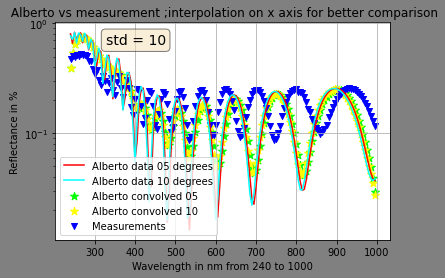

In [22]:
### over plotting reflectances for 5 and 10 degrees.

# %matplotlib inline
# %matplotlib qt

fig4 = plt.figure('4')
ax4 = plt.axes()
## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['05'] , marker = 'o', facecolor = 'none', edgecolor = 'blue')
## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['10'] , marker = '*', facecolor = 'orange', edgecolor = 'none')
## ax4.plot( wavelength_vector, R_SiPM_alberto_05_smooth )
## ax4.plot( wavelength_vector, R_SiPM_alberto_10_smooth )

R_SiPM_alberto_05_convolved = np.convolve( R_SiPM_alberto_05_smooth, norm_distr/sum(norm_distr), 'same')
R_SiPM_alberto_10_convolved = np.convolve( R_SiPM_alberto_10_smooth, norm_distr/sum(norm_distr), 'same')

ax4.plot(wavelength_vector, R_SiPM_alberto_05_smooth, color = 'red', label = 'Alberto data 05 degrees' )
ax4.plot(wavelength_vector, R_SiPM_alberto_10_smooth, color = '#00FFFF', label = 'Alberto data 10 degrees' )
# ax4.plot(wavelength_vector, R_SiPM_alberto_7_smooth, color = 'red', label = 'Alberto data 7 degrees incident' )

ax4.scatter(wavelength_vector, R_SiPM_alberto_05_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 05' )
ax4.scatter(wavelength_vector, R_SiPM_alberto_10_convolved, marker = '*', s = 70, color = 'yellow', label = 'Alberto convolved 10' )
# ax4.scatter(wavelength_vector, R_SiPM_alberto_7_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 7' )

ax4.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )
# ax4.scatter(x_axis, norm_distr/sum(norm_distr), color = 'teal', label ='Normal distribution ')
ax4.set_yscale('log')
fig4.set_facecolor('grey')
ax4.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
ax4.set_xlabel('Wavelength in nm from 240 to 1000')
ax4.set_ylabel('Reflectance in %')
ax4.grid()
# ax3.legend()
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
txtstr = 'std = ' + str(sd)
ax4.text(0.15, 0.95, txtstr, transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax4.legend()

<h4 style = 'color: magenta'> Average reflectance over angle from 0 to 90 angles</h4>
<p> Shouldn't we account for how light bounces around in the integrating sphere  before exiting it</p>

In [23]:
# R_SiPM_alberto_avg

R_SiPM_alberto_avg = pd.DataFrame()

R_SiPM_alberto_avg['Wavelength'] = R_SiPM_alberto_df['Wavelength']

R_SiPM_alberto_avg['avg'] =  R_SiPM_alberto_df.iloc[:,1:].mean(axis=1)

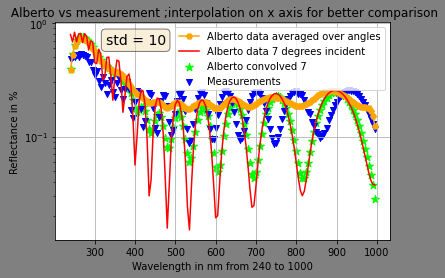

In [24]:
### here I convolve and plot for average of all angles from 0 to 90 

# %matplotlib inline
# %matplotlib qt

fig4 = plt.figure()
ax4 = plt.axes()
## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['05'] , marker = 'o', facecolor = 'none', edgecolor = 'blue')
## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['10'] , marker = '*', facecolor = 'orange', edgecolor = 'none')
## ax4.plot( wavelength_vector, R_SiPM_alberto_05_smooth )
## ax4.plot( wavelength_vector, R_SiPM_alberto_10_smooth )
R_SiPM_alberto_avg_inter_func = interp1d( R_SiPM_alberto_avg['Wavelength'], R_SiPM_alberto_avg['avg'] )
R_SiPM_alberto_avg_smooth = R_SiPM_alberto_avg_inter_func(wavelength_vector)

R_SiPM_alberto_avg_convolved = np.convolve( R_SiPM_alberto_avg_smooth, norm_distr/sum(norm_distr), 'same')

## R_SiPM_alberto_05_convolved = np.convolve( R_SiPM_alberto_05_smooth, norm_distr/sum(norm_distr), 'same')
## R_SiPM_alberto_10_convolved = np.convolve( R_SiPM_alberto_10_smooth, norm_distr/sum(norm_distr), 'same')

ax4.plot(wavelength_vector, R_SiPM_alberto_avg_convolved, color = 'orange', marker ='H', label = 'Alberto data averaged over angles' )

## ax4.plot(wavelength_vector, R_SiPM_alberto_05_smooth, color = 'red', label = 'Alberto data 05 degrees' )
## ax4.plot(wavelength_vector, R_SiPM_alberto_10_smooth, color = '#00FFFF', label = 'Alberto data 10 degrees' )

ax4.plot(wavelength_vector, R_SiPM_alberto_7_smooth, color = 'red', label = 'Alberto data 7 degrees incident' )

## ax4.scatter(wavelength_vector, R_SiPM_alberto_05_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 05' )
## ax4.scatter(wavelength_vector, R_SiPM_alberto_10_convolved, marker = '*', s = 70, color = 'yellow', label = 'Alberto convolved 10' )

ax4.scatter(wavelength_vector, R_SiPM_alberto_7_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 7' )

ax4.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )

# ax4.scatter(x_axis, norm_distr/sum(norm_distr), color = 'teal', label ='Normal distribution ')
ax4.set_yscale('log')
fig4.set_facecolor('grey')
ax4.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
ax4.set_xlabel('Wavelength in nm from 240 to 1000')
ax4.set_ylabel('Reflectance in %')
ax4.grid()
# ax3.legend()
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
txtstr = 'std = ' + str(sd)
ax4.text(0.15, 0.95, txtstr, transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax4.legend()

<h3 style = 'color: magenta'> Step function as slit function</h3>

In [25]:
def step_function(step_size, x_distribution):
    initial_step = x_distribution.mean()
    next_step = initial_step + step_size
    y_value = []
    for x_value in x_distribution:
        if (x_value > initial_step) & (x_value < next_step)  :
            y_value.append(1)
        else :
            y_value.append(0)
    return np.array(y_value)

In [26]:
# # an example of a step function

# %matplotlib inline

# my_x = np.arange(0,10, 0.01)
# my_y = step_function(1, my_x)
# ax11= plt.axes()
# ax11.plot(my_x, my_y, color='C0', label = 'step_function')
# ax11.plot(my_x, np.sin(my_x), color='C1', label = 'original signal')
# ax11.plot(my_x, np.convolve(my_y, np.sin(my_x), 'same')/max(np.convolve(my_y, np.sin(my_x), 'same')), 
#           color='C3', label = 'convolved signal')
# ax11.legend(loc = 'upper right')

<h4 style = 'color: magenta'> Is this right strategy to convolve two functions? </h4>

In [27]:
# %matplotlib inline
# plt.figure()
# my_X = np.arange(0, 15,0.1)
# my_Y = np.sin(my_X)
# slit_func = step_function( 1, my_X)
# plt.plot( my_X, my_Y, '-r')
# plt.plot( my_X, np.convolve( my_Y, slit_func, 'same')/max(np.convolve( my_Y, slit_func, 'same') ) , '-g')
# # plt.plot( my_X, np.convolve( my_Y, slit_func, 'same') , '-b')

In [28]:
slit_width = 7
slit_function = step_function(slit_width, wavelength_vector)

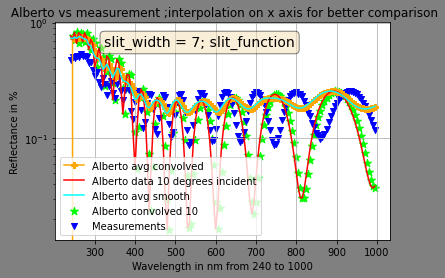

In [29]:
# %matplotlib inline
# %matplotlib qt

fig6 = plt.figure('6')
ax6 = plt.axes()

### careating smooth distributions
R_SiPM_alberto_avg_inter_func = interp1d( R_SiPM_alberto_avg['Wavelength'], R_SiPM_alberto_avg['avg'] )
R_SiPM_alberto_avg_smooth = R_SiPM_alberto_avg_inter_func(wavelength_vector)

### normalization
### convolution
R_SiPM_alberto_avg_convolved = max(R_SiPM_alberto_avg_smooth)*np.convolve( R_SiPM_alberto_avg_smooth, slit_function, 'same')/max(np.convolve( R_SiPM_alberto_avg_smooth, slit_function, 'same'))
R_SiPM_alberto_10_convolved = max( R_SiPM_alberto_10_smooth)* np.convolve( R_SiPM_alberto_10_smooth, slit_function, 'same')/max(np.convolve( R_SiPM_alberto_10_smooth, slit_function, 'same'))

### plotting
ax6.plot(wavelength_vector, R_SiPM_alberto_avg_convolved, color = 'orange', marker ='P', label = 'Alberto avg convolved' )


ax6.plot(wavelength_vector, R_SiPM_alberto_10_smooth, color = 'red', label = 'Alberto data 10 degrees incident' )
ax6.plot(wavelength_vector, R_SiPM_alberto_avg_smooth, color = 'cyan', label = 'Alberto avg smooth' )


ax6.scatter(wavelength_vector, R_SiPM_alberto_10_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 10' )

ax6.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )

ax6.set_yscale('log')
fig6.set_facecolor('grey')
ax6.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
ax6.set_xlabel('Wavelength in nm from 240 to 1000')
ax6.set_ylabel('Reflectance in %')
ax6.grid()
# ax3.legend()
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
txtstr = 'slit_width = ' + str(slit_width) +'; '+ 'slit_function'
ax6.text(0.15, 0.95, txtstr, transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax6.legend()